In [1]:
import torch
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_transform = transforms.Compose([transforms.ToTensor()])

In [3]:
train_dataset = datasets.ImageFolder(root='./data/train/', transform=data_transform)

In [4]:
dataset_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)

In [5]:
print (type(train_dataset))
print (type(dataset_loader))

<class 'torchvision.datasets.folder.ImageFolder'>
<class 'torch.utils.data.dataloader.DataLoader'>


In [6]:
for i,(images,labels) in enumerate(dataset_loader):
    print (type(images[0]))
    print (type(labels))
    if i==2:
        break

<class 'torch.FloatTensor'>
<class 'torch.LongTensor'>
<class 'torch.FloatTensor'>
<class 'torch.LongTensor'>
<class 'torch.FloatTensor'>
<class 'torch.LongTensor'>


In [63]:
%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

['FIVE', 'FOUR', 'NONE', 'ONE', 'THREE', 'TWO']
FIVE


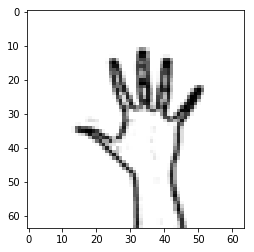

In [8]:
print (train_dataset.classes)
x,y = train_dataset[0] 
show(transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
])(x))
print (train_dataset.classes[y])

NONE


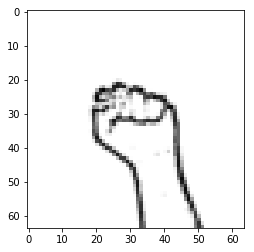

In [9]:
x,y = train_dataset[3371] 
show(transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
])(x))
print (train_dataset.classes[y])

In [10]:
for X, Y in dataset_loader:
    print (X.shape)
    print (Y.shape)
    break

torch.Size([16, 3, 64, 64])
torch.Size([16])


In [11]:
from torchsummary import summary
import torch 
import torch.nn as nn
from torch.autograd import Variable

In [12]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel,self).__init__()

        #conv 1
        self.cnn1=nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=2)
        self.relu1=nn.ReLU()

        #Maxpool 1
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        #conv 2
        self.cnn2=nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=2)
        self.relu2=nn.ReLU()

        #Maxpool 2
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        
        #conv 3
        self.cnn3=nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=2)
        self.relu3=nn.ReLU()

        #Maxpool 3
        self.maxpool3=nn.MaxPool2d(kernel_size=2)
        
        #FC 1
        self.fc1=nn.Linear(10368,6)

    def forward(self,x):
        '''
        ori=x[0][0].data.numpy()
        print ('original : ',ori.shape)
        plt.imshow(ori, cmap=plt.get_cmap('gray'))
        plt.show(),
        '''
        #conv1
        out=self.cnn1(x)
        out=self.relu1(out)
        '''
        #print type(out)
        intm=out[0][0].data.numpy()
        print ('conv 1: ',intm.shape)
        #imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),
        '''
        
        #max poo1 1
        out=self.maxpool1(out)
        '''
        ap=out[0][0].data.numpy()
        print ('maxpool 1 : ',ap.shape)
        plt.imshow(ap, cmap=plt.get_cmap('gray'))
        plt.show(),
        '''
        
        
        #conv2
        out=self.cnn2(out)
        out=self.relu2(out)
        '''
        intm=out[0][0].data.numpy()
        print ('conv 2: ',intm.shape)
        imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),
        '''
        
        #max poo1 2
        out=self.maxpool2(out)
        '''
        ap=out[0][0].data.numpy()
        print ('maxpool 2 : ',ap.shape)
        plt.imshow(ap, cmap=plt.get_cmap('gray'))
        plt.show()
        '''
        
        #conv3
        out=self.cnn3(out)
        out=self.relu3(out)
        '''
        intm=out[0][0].data.numpy()
        print ('conv 3: ',intm.shape)
        imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),
        '''
        
        #max poo1 3
        out=self.maxpool3(out)
        """ap=out[0][0].data.numpy()
        print ('maxpool 3 : ',ap.shape)
        plt.imshow(ap, cmap=plt.get_cmap('gray'))
        plt.show()
        """
        
        out=out.view(out.size(0),-1)
        
        #fc1
        out=self.fc1(out)
        
        return out

In [13]:
model=CNNModel()
criterion=nn.CrossEntropyLoss()
#learning_rate=0.01
optimizer=torch.optim.Adadelta(model.parameters())#,lr=learning_rate)

In [14]:
print (model.parameters())

<generator object Module.parameters at 0x7f83fa1acc50>


In [154]:
print(summary(model, (3, 64, 64)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 66, 66]             896
              ReLU-2           [-1, 32, 66, 66]               0
         MaxPool2d-3           [-1, 32, 33, 33]               0
            Conv2d-4           [-1, 64, 35, 35]           18496
              ReLU-5           [-1, 64, 35, 35]               0
         MaxPool2d-6           [-1, 64, 17, 17]               0
            Conv2d-7          [-1, 128, 19, 19]           73856
              ReLU-8          [-1, 128, 19, 19]               0
         MaxPool2d-9            [-1, 128, 9, 9]               0
           Linear-10                    [-1, 6]           62214
Total params: 155462
Trainable params: 155462
Non-trainable params: 0
----------------------------------------------------------------
None


In [16]:
#batch_size=4
#n_iters=1000
#epochs=(int)(n_iters/(len(train_dataset)/batch_size))
#epochs=5#int(epochs)
epochs=5
print (epochs)

5


In [17]:
#prepare Test data
test_dataset = datasets.ImageFolder(root='./data/test/', transform=data_transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=True, num_workers=4)

In [18]:
print (len(dataset_loader))
loss_list=[]

568


In [21]:
iter=0
for epoch in range(epochs):
    print('Epoch : '+ str(epoch))
    for i,(images,labels) in enumerate(dataset_loader):
        
        images=Variable(images)
        labels=Variable(labels)
        #print (type(images))
        #print (type(labels))
        #print (images.shape)
        #print (labels.shape)
        
        optimizer.zero_grad()
        
        outputs=model(images)
        
        loss=criterion(outputs,labels)
        
        loss.backward()
        
        optimizer.step()
        #break
        iter+=1
        
        if iter%25 == 0:
            correct=0
            total=0
            
            for images,labels in test_loader:
                
                images=Variable(images)
                
                outputs=model(images)
                
                _,predicted=torch.max(outputs.data,1)
                
                total+=labels.size(0)
                
                correct+=(predicted==labels).sum()
            
            accuracy = 100*correct/total
            torch.save(CNNModel, './model1.pth')
            print('Iteration {}. Loss {}. Accuracy{}'.format(iter,loss.data[0],accuracy))
            loss_list.append(loss.data[0])
            print(loss_list)
            #print('{{"metric": "accuracy", "value": {}}}'.format(accuracy))
            #print('{{"metric": "loss", "value": {}}}'.format(loss.data[0]))

Epoch : 0


/usr/local/lib/python3.6/site-packages/torch/serialization.py:147: UserWarning: Couldn't retrieve source code for container of type CNNModel. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Iteration 25. Loss 1.7764463424682617. Accuracy16.65748898678414
[1.7890126705169678, 1.7764463424682617]
Iteration 50. Loss 1.9220905303955078. Accuracy23.155286343612335
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078]
Iteration 75. Loss 1.3994512557983398. Accuracy35.49008810572687
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512557983398]
Iteration 100. Loss 1.0123472213745117. Accuracy52.58810572687225
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512557983398, 1.0123472213745117]
Iteration 125. Loss 1.0734370946884155. Accuracy64.97797356828194
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512557983398, 1.0123472213745117, 1.0734370946884155]
Iteration 150. Loss 0.9651587605476379. Accuracy68.61233480176212
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512557983398, 1.0123472213745117, 1.0734370946884155, 0.9651587605476379]
Iteration 175. Loss 0.822376012802124. Accuracy70.8975770925

Iteration 625. Loss 0.014970696531236172. Accuracy94.9614537444934
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512557983398, 1.0123472213745117, 1.0734370946884155, 0.9651587605476379, 0.822376012802124, 0.39592331647872925, 0.518352746963501, 0.23662137985229492, 0.052253637462854385, 0.23062102496623993, 0.226962149143219, 0.3786547780036926, 0.06361810863018036, 0.0457017607986927, 0.06494660675525665, 0.025996364653110504, 0.008148162625730038, 0.022782055661082268, 0.5815438032150269, 0.007441092748194933, 0.05970822647213936, 0.006015663500875235, 0.014970696531236172]
Iteration 650. Loss 0.018521199002861977. Accuracy94.60352422907489
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512557983398, 1.0123472213745117, 1.0734370946884155, 0.9651587605476379, 0.822376012802124, 0.39592331647872925, 0.518352746963501, 0.23662137985229492, 0.052253637462854385, 0.23062102496623993, 0.226962149143219, 0.3786547780036926, 0.06361810863018036, 0.0

Iteration 925. Loss 0.0001893014123197645. Accuracy93.69493392070484
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512557983398, 1.0123472213745117, 1.0734370946884155, 0.9651587605476379, 0.822376012802124, 0.39592331647872925, 0.518352746963501, 0.23662137985229492, 0.052253637462854385, 0.23062102496623993, 0.226962149143219, 0.3786547780036926, 0.06361810863018036, 0.0457017607986927, 0.06494660675525665, 0.025996364653110504, 0.008148162625730038, 0.022782055661082268, 0.5815438032150269, 0.007441092748194933, 0.05970822647213936, 0.006015663500875235, 0.014970696531236172, 0.018521199002861977, 0.011133227497339249, 0.010272478684782982, 0.020478935912251472, 0.025175178423523903, 0.002161100273951888, 0.000647118198685348, 0.0023166572209447622, 0.02616085112094879, 0.006228765472769737, 0.0005524961743503809, 0.0001893014123197645]
Iteration 950. Loss 0.0019908584654331207. Accuracy93.75
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512

Epoch : 2
Iteration 1150. Loss 0.0004215945955365896. Accuracy94.7136563876652
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512557983398, 1.0123472213745117, 1.0734370946884155, 0.9651587605476379, 0.822376012802124, 0.39592331647872925, 0.518352746963501, 0.23662137985229492, 0.052253637462854385, 0.23062102496623993, 0.226962149143219, 0.3786547780036926, 0.06361810863018036, 0.0457017607986927, 0.06494660675525665, 0.025996364653110504, 0.008148162625730038, 0.022782055661082268, 0.5815438032150269, 0.007441092748194933, 0.05970822647213936, 0.006015663500875235, 0.014970696531236172, 0.018521199002861977, 0.011133227497339249, 0.010272478684782982, 0.020478935912251472, 0.025175178423523903, 0.002161100273951888, 0.000647118198685348, 0.0023166572209447622, 0.02616085112094879, 0.006228765472769737, 0.0005524961743503809, 0.0001893014123197645, 0.0019908584654331207, 0.001931625185534358, 0.0016827837098389864, 0.003784741973504424, 0.06834371387958527, 0.0518

Iteration 1350. Loss 0.002969833090901375. Accuracy94.46585903083701
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512557983398, 1.0123472213745117, 1.0734370946884155, 0.9651587605476379, 0.822376012802124, 0.39592331647872925, 0.518352746963501, 0.23662137985229492, 0.052253637462854385, 0.23062102496623993, 0.226962149143219, 0.3786547780036926, 0.06361810863018036, 0.0457017607986927, 0.06494660675525665, 0.025996364653110504, 0.008148162625730038, 0.022782055661082268, 0.5815438032150269, 0.007441092748194933, 0.05970822647213936, 0.006015663500875235, 0.014970696531236172, 0.018521199002861977, 0.011133227497339249, 0.010272478684782982, 0.020478935912251472, 0.025175178423523903, 0.002161100273951888, 0.000647118198685348, 0.0023166572209447622, 0.02616085112094879, 0.006228765472769737, 0.0005524961743503809, 0.0001893014123197645, 0.0019908584654331207, 0.001931625185534358, 0.0016827837098389864, 0.003784741973504424, 0.06834371387958527, 0.05184972658753

Iteration 1525. Loss 0.0010708991903811693. Accuracy96.58590308370044
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512557983398, 1.0123472213745117, 1.0734370946884155, 0.9651587605476379, 0.822376012802124, 0.39592331647872925, 0.518352746963501, 0.23662137985229492, 0.052253637462854385, 0.23062102496623993, 0.226962149143219, 0.3786547780036926, 0.06361810863018036, 0.0457017607986927, 0.06494660675525665, 0.025996364653110504, 0.008148162625730038, 0.022782055661082268, 0.5815438032150269, 0.007441092748194933, 0.05970822647213936, 0.006015663500875235, 0.014970696531236172, 0.018521199002861977, 0.011133227497339249, 0.010272478684782982, 0.020478935912251472, 0.025175178423523903, 0.002161100273951888, 0.000647118198685348, 0.0023166572209447622, 0.02616085112094879, 0.006228765472769737, 0.0005524961743503809, 0.0001893014123197645, 0.0019908584654331207, 0.001931625185534358, 0.0016827837098389864, 0.003784741973504424, 0.06834371387958527, 0.0518497265875

Iteration 1675. Loss 3.590034248190932e-05. Accuracy94.68612334801762
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512557983398, 1.0123472213745117, 1.0734370946884155, 0.9651587605476379, 0.822376012802124, 0.39592331647872925, 0.518352746963501, 0.23662137985229492, 0.052253637462854385, 0.23062102496623993, 0.226962149143219, 0.3786547780036926, 0.06361810863018036, 0.0457017607986927, 0.06494660675525665, 0.025996364653110504, 0.008148162625730038, 0.022782055661082268, 0.5815438032150269, 0.007441092748194933, 0.05970822647213936, 0.006015663500875235, 0.014970696531236172, 0.018521199002861977, 0.011133227497339249, 0.010272478684782982, 0.020478935912251472, 0.025175178423523903, 0.002161100273951888, 0.000647118198685348, 0.0023166572209447622, 0.02616085112094879, 0.006228765472769737, 0.0005524961743503809, 0.0001893014123197645, 0.0019908584654331207, 0.001931625185534358, 0.0016827837098389864, 0.003784741973504424, 0.06834371387958527, 0.0518497265875

Iteration 1825. Loss 0.0001663746079429984. Accuracy96.00770925110132
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512557983398, 1.0123472213745117, 1.0734370946884155, 0.9651587605476379, 0.822376012802124, 0.39592331647872925, 0.518352746963501, 0.23662137985229492, 0.052253637462854385, 0.23062102496623993, 0.226962149143219, 0.3786547780036926, 0.06361810863018036, 0.0457017607986927, 0.06494660675525665, 0.025996364653110504, 0.008148162625730038, 0.022782055661082268, 0.5815438032150269, 0.007441092748194933, 0.05970822647213936, 0.006015663500875235, 0.014970696531236172, 0.018521199002861977, 0.011133227497339249, 0.010272478684782982, 0.020478935912251472, 0.025175178423523903, 0.002161100273951888, 0.000647118198685348, 0.0023166572209447622, 0.02616085112094879, 0.006228765472769737, 0.0005524961743503809, 0.0001893014123197645, 0.0019908584654331207, 0.001931625185534358, 0.0016827837098389864, 0.003784741973504424, 0.06834371387958527, 0.0518497265875

Iteration 1950. Loss 0.00012441955914255232. Accuracy96.36563876651982
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512557983398, 1.0123472213745117, 1.0734370946884155, 0.9651587605476379, 0.822376012802124, 0.39592331647872925, 0.518352746963501, 0.23662137985229492, 0.052253637462854385, 0.23062102496623993, 0.226962149143219, 0.3786547780036926, 0.06361810863018036, 0.0457017607986927, 0.06494660675525665, 0.025996364653110504, 0.008148162625730038, 0.022782055661082268, 0.5815438032150269, 0.007441092748194933, 0.05970822647213936, 0.006015663500875235, 0.014970696531236172, 0.018521199002861977, 0.011133227497339249, 0.010272478684782982, 0.020478935912251472, 0.025175178423523903, 0.002161100273951888, 0.000647118198685348, 0.0023166572209447622, 0.02616085112094879, 0.006228765472769737, 0.0005524961743503809, 0.0001893014123197645, 0.0019908584654331207, 0.001931625185534358, 0.0016827837098389864, 0.003784741973504424, 0.06834371387958527, 0.051849726587

Iteration 2075. Loss 9.46713553275913e-05. Accuracy95.45704845814979
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512557983398, 1.0123472213745117, 1.0734370946884155, 0.9651587605476379, 0.822376012802124, 0.39592331647872925, 0.518352746963501, 0.23662137985229492, 0.052253637462854385, 0.23062102496623993, 0.226962149143219, 0.3786547780036926, 0.06361810863018036, 0.0457017607986927, 0.06494660675525665, 0.025996364653110504, 0.008148162625730038, 0.022782055661082268, 0.5815438032150269, 0.007441092748194933, 0.05970822647213936, 0.006015663500875235, 0.014970696531236172, 0.018521199002861977, 0.011133227497339249, 0.010272478684782982, 0.020478935912251472, 0.025175178423523903, 0.002161100273951888, 0.000647118198685348, 0.0023166572209447622, 0.02616085112094879, 0.006228765472769737, 0.0005524961743503809, 0.0001893014123197645, 0.0019908584654331207, 0.001931625185534358, 0.0016827837098389864, 0.003784741973504424, 0.06834371387958527, 0.05184972658753

Iteration 2200. Loss 7.387896403088234e-06. Accuracy96.2830396475771
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512557983398, 1.0123472213745117, 1.0734370946884155, 0.9651587605476379, 0.822376012802124, 0.39592331647872925, 0.518352746963501, 0.23662137985229492, 0.052253637462854385, 0.23062102496623993, 0.226962149143219, 0.3786547780036926, 0.06361810863018036, 0.0457017607986927, 0.06494660675525665, 0.025996364653110504, 0.008148162625730038, 0.022782055661082268, 0.5815438032150269, 0.007441092748194933, 0.05970822647213936, 0.006015663500875235, 0.014970696531236172, 0.018521199002861977, 0.011133227497339249, 0.010272478684782982, 0.020478935912251472, 0.025175178423523903, 0.002161100273951888, 0.000647118198685348, 0.0023166572209447622, 0.02616085112094879, 0.006228765472769737, 0.0005524961743503809, 0.0001893014123197645, 0.0019908584654331207, 0.001931625185534358, 0.0016827837098389864, 0.003784741973504424, 0.06834371387958527, 0.05184972658753

Iteration 2300. Loss 0.00024250171554740518. Accuracy95.78744493392071
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512557983398, 1.0123472213745117, 1.0734370946884155, 0.9651587605476379, 0.822376012802124, 0.39592331647872925, 0.518352746963501, 0.23662137985229492, 0.052253637462854385, 0.23062102496623993, 0.226962149143219, 0.3786547780036926, 0.06361810863018036, 0.0457017607986927, 0.06494660675525665, 0.025996364653110504, 0.008148162625730038, 0.022782055661082268, 0.5815438032150269, 0.007441092748194933, 0.05970822647213936, 0.006015663500875235, 0.014970696531236172, 0.018521199002861977, 0.011133227497339249, 0.010272478684782982, 0.020478935912251472, 0.025175178423523903, 0.002161100273951888, 0.000647118198685348, 0.0023166572209447622, 0.02616085112094879, 0.006228765472769737, 0.0005524961743503809, 0.0001893014123197645, 0.0019908584654331207, 0.001931625185534358, 0.0016827837098389864, 0.003784741973504424, 0.06834371387958527, 0.051849726587

Iteration 2400. Loss 2.9246575650176965e-06. Accuracy96.47577092511013
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512557983398, 1.0123472213745117, 1.0734370946884155, 0.9651587605476379, 0.822376012802124, 0.39592331647872925, 0.518352746963501, 0.23662137985229492, 0.052253637462854385, 0.23062102496623993, 0.226962149143219, 0.3786547780036926, 0.06361810863018036, 0.0457017607986927, 0.06494660675525665, 0.025996364653110504, 0.008148162625730038, 0.022782055661082268, 0.5815438032150269, 0.007441092748194933, 0.05970822647213936, 0.006015663500875235, 0.014970696531236172, 0.018521199002861977, 0.011133227497339249, 0.010272478684782982, 0.020478935912251472, 0.025175178423523903, 0.002161100273951888, 0.000647118198685348, 0.0023166572209447622, 0.02616085112094879, 0.006228765472769737, 0.0005524961743503809, 0.0001893014123197645, 0.0019908584654331207, 0.001931625185534358, 0.0016827837098389864, 0.003784741973504424, 0.06834371387958527, 0.051849726587

Iteration 2500. Loss 8.667998940836696e-07. Accuracy96.55837004405286
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512557983398, 1.0123472213745117, 1.0734370946884155, 0.9651587605476379, 0.822376012802124, 0.39592331647872925, 0.518352746963501, 0.23662137985229492, 0.052253637462854385, 0.23062102496623993, 0.226962149143219, 0.3786547780036926, 0.06361810863018036, 0.0457017607986927, 0.06494660675525665, 0.025996364653110504, 0.008148162625730038, 0.022782055661082268, 0.5815438032150269, 0.007441092748194933, 0.05970822647213936, 0.006015663500875235, 0.014970696531236172, 0.018521199002861977, 0.011133227497339249, 0.010272478684782982, 0.020478935912251472, 0.025175178423523903, 0.002161100273951888, 0.000647118198685348, 0.0023166572209447622, 0.02616085112094879, 0.006228765472769737, 0.0005524961743503809, 0.0001893014123197645, 0.0019908584654331207, 0.001931625185534358, 0.0016827837098389864, 0.003784741973504424, 0.06834371387958527, 0.0518497265875

Iteration 2600. Loss 6.387845132849179e-06. Accuracy96.36563876651982
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512557983398, 1.0123472213745117, 1.0734370946884155, 0.9651587605476379, 0.822376012802124, 0.39592331647872925, 0.518352746963501, 0.23662137985229492, 0.052253637462854385, 0.23062102496623993, 0.226962149143219, 0.3786547780036926, 0.06361810863018036, 0.0457017607986927, 0.06494660675525665, 0.025996364653110504, 0.008148162625730038, 0.022782055661082268, 0.5815438032150269, 0.007441092748194933, 0.05970822647213936, 0.006015663500875235, 0.014970696531236172, 0.018521199002861977, 0.011133227497339249, 0.010272478684782982, 0.020478935912251472, 0.025175178423523903, 0.002161100273951888, 0.000647118198685348, 0.0023166572209447622, 0.02616085112094879, 0.006228765472769737, 0.0005524961743503809, 0.0001893014123197645, 0.0019908584654331207, 0.001931625185534358, 0.0016827837098389864, 0.003784741973504424, 0.06834371387958527, 0.0518497265875

Iteration 2700. Loss 7.161478521311437e-08. Accuracy94.93392070484582
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512557983398, 1.0123472213745117, 1.0734370946884155, 0.9651587605476379, 0.822376012802124, 0.39592331647872925, 0.518352746963501, 0.23662137985229492, 0.052253637462854385, 0.23062102496623993, 0.226962149143219, 0.3786547780036926, 0.06361810863018036, 0.0457017607986927, 0.06494660675525665, 0.025996364653110504, 0.008148162625730038, 0.022782055661082268, 0.5815438032150269, 0.007441092748194933, 0.05970822647213936, 0.006015663500875235, 0.014970696531236172, 0.018521199002861977, 0.011133227497339249, 0.010272478684782982, 0.020478935912251472, 0.025175178423523903, 0.002161100273951888, 0.000647118198685348, 0.0023166572209447622, 0.02616085112094879, 0.006228765472769737, 0.0005524961743503809, 0.0001893014123197645, 0.0019908584654331207, 0.001931625185534358, 0.0016827837098389864, 0.003784741973504424, 0.06834371387958527, 0.0518497265875

Iteration 2800. Loss 2.928825324488571e-07. Accuracy96.7511013215859
[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512557983398, 1.0123472213745117, 1.0734370946884155, 0.9651587605476379, 0.822376012802124, 0.39592331647872925, 0.518352746963501, 0.23662137985229492, 0.052253637462854385, 0.23062102496623993, 0.226962149143219, 0.3786547780036926, 0.06361810863018036, 0.0457017607986927, 0.06494660675525665, 0.025996364653110504, 0.008148162625730038, 0.022782055661082268, 0.5815438032150269, 0.007441092748194933, 0.05970822647213936, 0.006015663500875235, 0.014970696531236172, 0.018521199002861977, 0.011133227497339249, 0.010272478684782982, 0.020478935912251472, 0.025175178423523903, 0.002161100273951888, 0.000647118198685348, 0.0023166572209447622, 0.02616085112094879, 0.006228765472769737, 0.0005524961743503809, 0.0001893014123197645, 0.0019908584654331207, 0.001931625185534358, 0.0016827837098389864, 0.003784741973504424, 0.06834371387958527, 0.05184972658753

In [22]:
print(loss_list)

[1.7890126705169678, 1.7764463424682617, 1.9220905303955078, 1.3994512557983398, 1.0123472213745117, 1.0734370946884155, 0.9651587605476379, 0.822376012802124, 0.39592331647872925, 0.518352746963501, 0.23662137985229492, 0.052253637462854385, 0.23062102496623993, 0.226962149143219, 0.3786547780036926, 0.06361810863018036, 0.0457017607986927, 0.06494660675525665, 0.025996364653110504, 0.008148162625730038, 0.022782055661082268, 0.5815438032150269, 0.007441092748194933, 0.05970822647213936, 0.006015663500875235, 0.014970696531236172, 0.018521199002861977, 0.011133227497339249, 0.010272478684782982, 0.020478935912251472, 0.025175178423523903, 0.002161100273951888, 0.000647118198685348, 0.0023166572209447622, 0.02616085112094879, 0.006228765472769737, 0.0005524961743503809, 0.0001893014123197645, 0.0019908584654331207, 0.001931625185534358, 0.0016827837098389864, 0.003784741973504424, 0.06834371387958527, 0.05184972658753395, 0.0006819356931373477, 0.10978244990110397, 0.000421594595536589

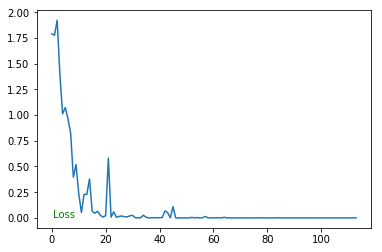

In [23]:
plt.plot(loss_list)
plt.text(0.5, 0, 'Loss', fontdict={'size': 10, 'color':  'green'})
plt.show()

In [85]:
torch.save(model.state_dict(), 'model_chk.pt')

In [86]:
test_model = CNNModel()
test_model.load_state_dict(torch.load('model_chk.pt'))

In [87]:
test_accuracy_list=[]
for images,labels in test_loader:

    images=Variable(images)

    outputs=test_model(images)

    _,predicted=torch.max(outputs.data,1)

    total+=labels.size(0)

    correct+=(predicted==labels).sum()

    accuracy = 100*correct/total
    
    test_accuracy_list.append(accuracy)
    #print('Predicted {}, GT {}, Accuracy{}'.format(predicted,labels,accuracy))

In [88]:
#print (test_accuracy_list)
print('Average accuracy on the test set is {} '.format(sum(test_accuracy_list) / float(len(test_accuracy_list))))

Average accuracy on the test set is 97.28448438289819 


In [152]:
def printevaluation(pred,gt,x):
    #def show(img):
    npimg = x.numpy()
    #plt.cla()
    plt.figure(figsize=(5,5))
    plt.text(3, 5, 'Ground Truth '+  gt, fontdict={'size': 20, 'color':  'green'})
    plt.text(3, 10, 'Predicted '+ pred, fontdict={'size': 20, 'color':  'red'})
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    

In [136]:
def evaluate(idx):
    x,y = train_dataset[idx] 
    #print (train_dataset.classes[y])
    a=Variable(x.unsqueeze(0))
    outputs=test_model(a)
    _,predicted=torch.max(outputs.data,1)
    #print (train_dataset.classes[predicted[0]])
    #print(' Original Label {} , Predicted {} '.format(train_dataset.classes[y],train_dataset.classes[predicted[0]]))
    
    d=transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])(x)
    #printevaluation(d)
    printevaluation(train_dataset.classes[predicted[0]],train_dataset.classes[y],transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])(x))

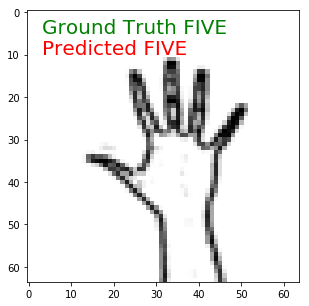

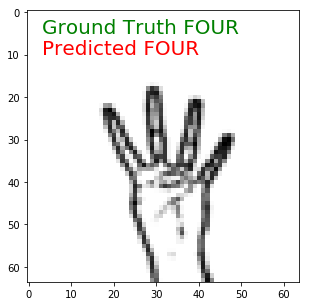

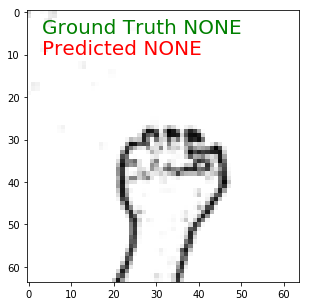

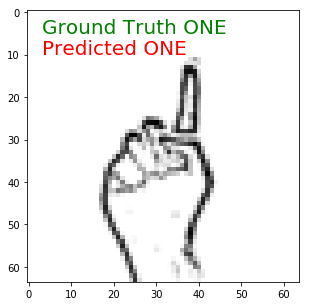

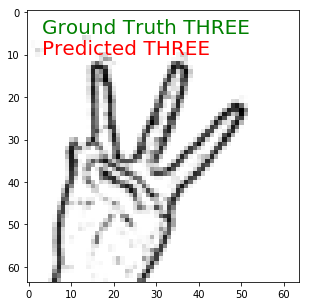

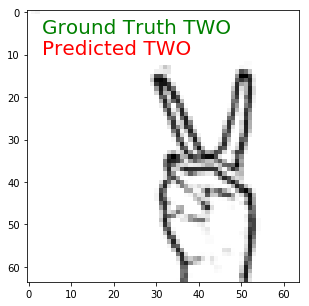

In [153]:
test_indices=[0,2222,3222,4822,6322,7622]
for test_index in test_indices:
    evaluate(test_index)